# Project Overview

# FordGoBike System Data Investigation

The FordGoBikeSystem dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The Dataset consists of the following datapoints:

Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

My investigation is aimed at drawing relationships between differnt variables that potentially analyze the factors that correspond to the profitability of the high demand stations and low demand stations.

For example for the station_id with the highest demand, we can find which hour of the day does this station_id see the highest and lowest demand, we can also draw some relationship between the station_id with the lowest demand to determine if that is a viable station to still keep basically this can help make business decisions about whether to keep that station or lose it to gain a different one that helps business.

In [37]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

In [59]:
df = pd.read_csv('master_file.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [67]:
df.shape

(2506983, 15)

In [61]:
df_clean = df.copy()

# Cleaning Quality Issue

# Correcting the datatypes of the variables appropriately

In [75]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [72]:
df_clean.start_station_id = df_clean.start_station_id.fillna(0)
df_clean.end_station_id = df_clean.end_station_id.fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
df_clean.start_station_id = df_clean.start_station_id.astype(int)
df_clean.end_station_id = df_clean.end_station_id.astype(int)

In [76]:
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['end_hour_day'] = df_clean.end_time.dt.strftime('%H')
df_clean['start_day_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] =  df_clean.start_time.dt.strftime('%B')
df_clean['year'] = df_clean.start_time.dt.strftime('%Y')

In [77]:
df_clean = df_clean[df_clean.rental_access_method.notnull()]

In [78]:
df_clean.shape

(120838, 21)

# Visualizations

# For the station that sees the highest demand, what is the time of the day where it faces a high demand volume?

In [79]:
df_clean.start_station_id.value_counts(sort=True)

0      79989
296     1365
312      931
81       918
67       777
       ...  
490        1
432        1
224        1
472        1
471        1
Name: start_station_id, Length: 418, dtype: int64

In [80]:
df_maxstart_station = df_clean[df_clean.start_station_id == 296]

In [81]:
df_maxstart_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour_day,end_hour_day,start_day_week,start_month,year
628936,282,2019-07-16 18:53:51,2019-07-16 18:58:34,296,5th St at Virginia St,37.325998,-121.87712,0,1st St at San Carlos Ave,37.331035,...,499829,Customer,NaN,app,2019-07-16,18,18,Tuesday,July,2019
628937,620,2019-07-12 19:40:59,2019-07-12 19:51:20,296,5th St at Virginia St,37.325998,-121.87712,311,Paseo De San Antonio at 2nd St,37.333798,...,680326,Subscriber,NaN,app,2019-07-12,19,19,Friday,July,2019
628938,1178,2019-07-10 16:33:29,2019-07-10 16:53:08,296,5th St at Virginia St,37.325998,-121.87712,276,Julian St at The Alameda,37.332233,...,664682,Subscriber,NaN,app,2019-07-10,16,16,Wednesday,July,2019
628939,819,2019-07-15 23:31:36,2019-07-15 23:45:15,296,5th St at Virginia St,37.325998,-121.87712,308,San Pedro Square,37.336802,...,421921,Subscriber,NaN,app,2019-07-15,23,23,Monday,July,2019
628940,550,2019-07-17 08:59:16,2019-07-17 09:08:26,296,5th St at Virginia St,37.325998,-121.87712,0,1st St at San Carlos Ave,37.331149,...,734415,Subscriber,NaN,app,2019-07-17,08,09,Wednesday,July,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322379,264,2019-11-25 23:18:37,2019-11-25 23:23:02,296,5th St at Virginia St,37.325998,-121.87712,296,5th St at Virginia St,37.325998,...,842581,Subscriber,NaN,app,2019-11-25,23,23,Monday,November,2019
2322380,745,2019-11-27 13:02:52,2019-11-27 13:15:17,296,5th St at Virginia St,37.325998,-121.87712,310,San Fernando St at 4th St,37.335885,...,481459,Subscriber,NaN,clipper,2019-11-27,13,13,Wednesday,November,2019
2322381,174,2019-11-25 22:23:55,2019-11-25 22:26:49,296,5th St at Virginia St,37.325998,-121.87712,296,5th St at Virginia St,37.325998,...,190225,Subscriber,NaN,app,2019-11-25,22,22,Monday,November,2019
2322382,540,2019-11-29 09:19:56,2019-11-29 09:28:57,296,5th St at Virginia St,37.325998,-121.87712,341,Fountain Alley at S 2nd St,37.336188,...,100235,Subscriber,NaN,app,2019-11-29,09,09,Friday,November,2019


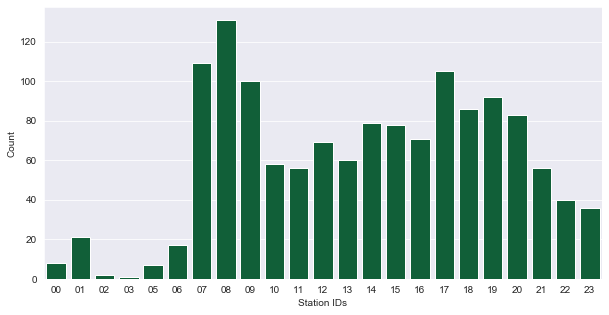

In [82]:
plt.rcParams['figure.figsize'] = 10, 5
base_color = sb.color_palette('YlGn_r')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_maxstart_station, x='start_hour_day', color=base_color);
plt.xlabel('Station IDs');
plt.ylabel('Count');

So, this stations has the highest demand during the morning times mostly around 7-9am and in the evenings at around 5pm. This is understandable, given that those are the commute hours for the office, school and college going population

# For the station that sees the highest demand, which day of the week has a high demand volume?

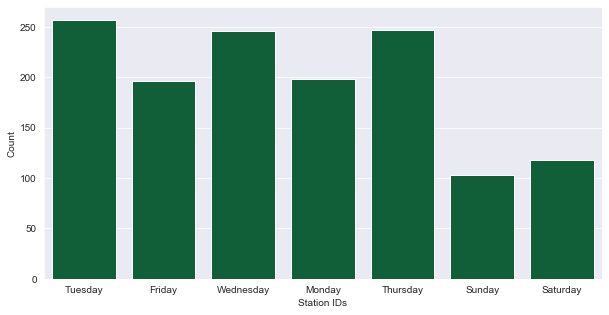

In [95]:
plt.rcParams['figure.figsize'] = 10, 5
base_color = sb.color_palette('YlGn_r')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_maxstart_station, x='start_day_week', color=base_color);
plt.xlabel('Station IDs');
plt.ylabel('Count');

For this station,the highest demand was on Tuesdays followed by Thursdays. The least demand was on Sundays. 

# The User_type who use this station the most

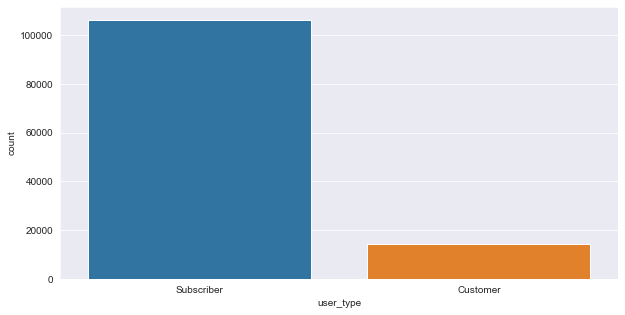

In [83]:
sb.countplot(x='user_type', data=df_clean)

# Hourly usage of the bikes by Customers and Subscribers in this station

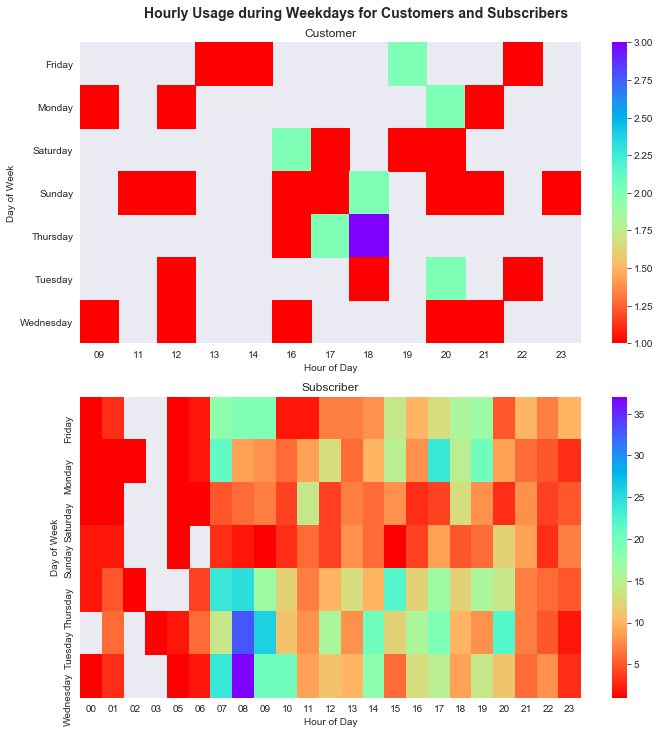

In [93]:
plt.figure(figsize=[10, 10]);

plt.subplot(2, 1, 1)
customers = df_maxstart_station.query('user_type == "Customer"')
cus_count = customers.groupby(['start_day_week', 'start_hour_day']).size()
cus_count = cus_count.reset_index(name='count')
cus_count = cus_count.pivot(index='start_day_week', columns='start_hour_day', values='count')
sb.heatmap(cus_count, cmap='rainbow_r');
plt.title('Customer');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_maxstart_station.query('user_type == "Subscriber"')
sub_count = subscribers.groupby(['start_day_week', 'start_hour_day']).size()
sub_count = sub_count.reset_index(name='count')
sub_count = sub_count.pivot(index='start_day_week', columns='start_hour_day', values='count')
sb.heatmap(sub_count, cmap='rainbow_r');
plt.title('Subscriber');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

# Distribution of usage for the station with the lowest demand

In [87]:
df_clean.start_station_id.value_counts(sort=True)

0      79989
296     1365
312      931
81       918
67       777
       ...  
490        1
432        1
224        1
472        1
471        1
Name: start_station_id, Length: 418, dtype: int64

In [84]:
df_minstart_station = df_clean[df_clean.start_station_id == 471]

In [85]:
df_minstart_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour_day,end_hour_day,start_day_week,start_month,year
2131293,1696,2019-12-28 14:47:38,2019-12-28 15:15:54,471,Turk Blvd at Stanyan St,37.777609,-122.454622,0,NaN,37.789848,...,493329,Customer,NaN,app,2019-12-28,14,15,Saturday,December,2019


This station was last used on 2019-12-28 and it seems to have just one ride starting from this station and ending in station is not given hence 0. Hence it looks like this station might have been added towards the end of the year and hence it is important to gather more data on this station in the year 2020 to make a decision on whether this station is a profitable station or not for the business. 

# Summary

Through my analysis here,we can see that we have analysed the station with highest demand and the station with lowest demand count in the year 2019 and used that to identify trends and patterns that provide valuable insights into the profitability of the station. 